### QED-C Application-Oriented Benchmarks - Qiskit - Hydrogen Lattice

The notebook contains specific examples for the Hydrogen Lattice benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [10]:
min_qubits=2
max_qubits=16
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                   "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator
# backend_id="aqt_qasm_simulator"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }


In [8]:
# Custom optimization options can be specified in this cell (below is an example)

import sys
sys.path.insert(1, "../../")

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })

#exec_options.update({ "noise_model": None })

### Hydrogen Lattice - Method 1 - Fidelity of Ansatz

This benchmark is similar to benchmarks at the top-level in that it executes a quantum circuit to measure its fidelity of execution on a specific backend system.
Here, the circuit tested is a pUCCD ansatz used in a quantum simulation of a hydrogen lattice.

Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Sep 10, 2023 04:17:51 UTC
************
Executing [1] circuits for num_qubits = 2
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Executing [1] circuits for num_qubits = 10
************
Executing [1] circuits for num_qubits = 12
************
Executing [1] circuits for num_qubits = 14
************
Executing [1] circuits for num_qubits = 16
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.016, 1.065, 0.004 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.988, 0.977



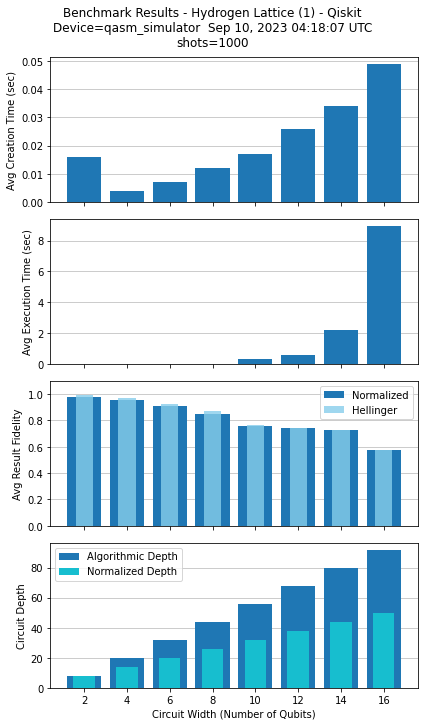

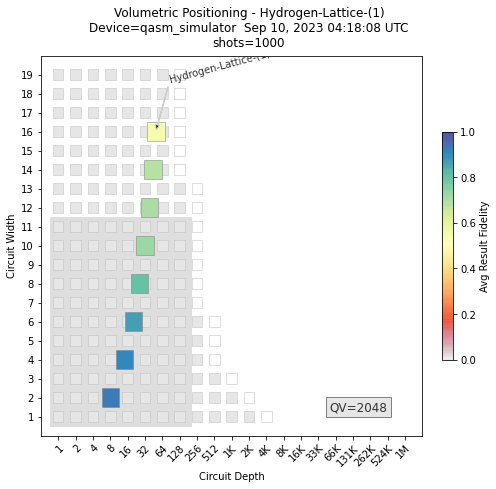

In [11]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# Arguments applicable to Hydrogen Lattice benchmark method (1)
hl_app_args = dict(
    
    radius=None,                # select single problem radius, None = use max_circuits problem
    
    parameterized=False,        # use Parameter objects in circuit and cache transpiled circuits
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    #thetas_array=[0],          # use custom thetas_array
)

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)


### Hydrogen Lattice - Method 2 - Energy as Objective Function

This method executes the benchmark as a Variational Quantum Eigensolver (VQE) that uses the ansatz tested in method (1).


Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Sep 09, 2023 20:46:14 UTC
************
Executing [1] restarts for num_qubits = 16

.....................
Classically Computed Energies from solution file for 16 qubits and radius 0.75
  DOCI calculated energy : -8.076288353180047
  FCI calculated energy : -8.22378616525954
  Random Solution calculated energy : 6.3008656580185285
Computed Energies for 16 qubits and radius 0.75
  Lowest Energy : -6.696637690236756
  Solution Quality : 0.941059176757581, Accuracy Ratio : 0.8948581698478111
************
Average Circuit Algorithmic Depth, ξ (xi) for the 16 qubit group = 92, 0.198
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 16 qubit group = 50, 0.41, 128.0
Average Creation, Elapsed, Execution Time for the 16 qubit group = 0.05, 29.215, 28.984 secs
Average Transpiling, Validating, Running Times for group 16 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 

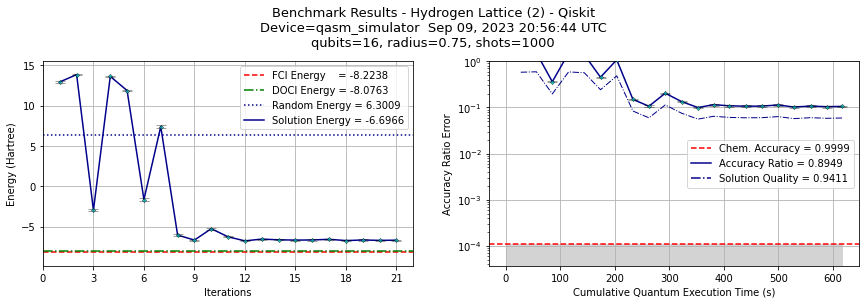

----- Cumulative Plots for all qubit groups -----


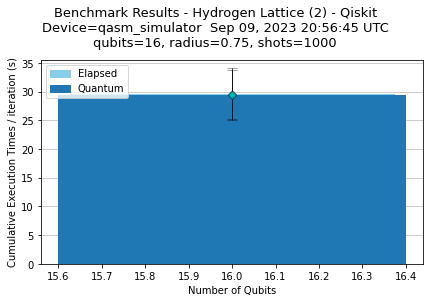

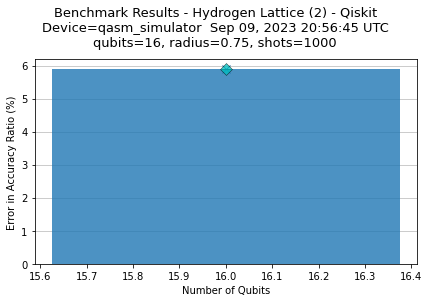

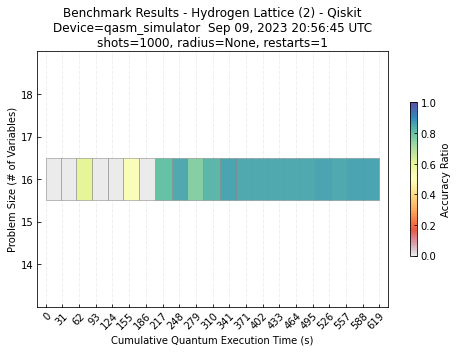

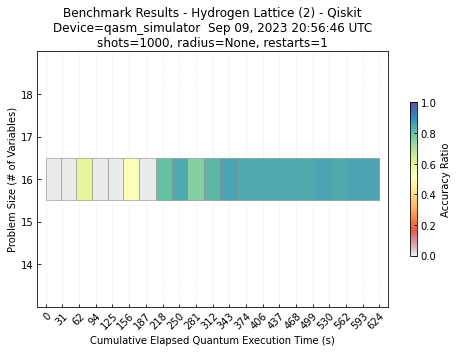

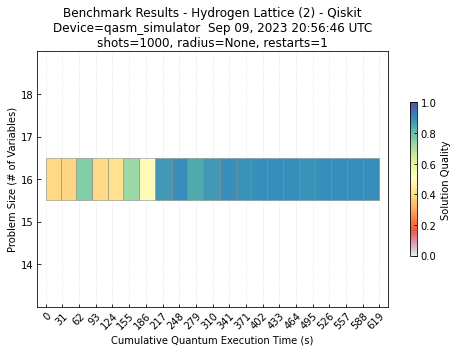

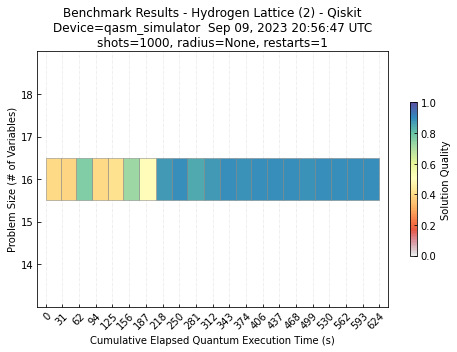

In [9]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# Arguments specific to Hydrogen Lattice benchmark method (2)
hl_app_args = dict(
    
    radius=None,                # select single problem radius, None = use max_circuits problems
    max_iter=30,                # maximum minimizer iterations to perform
    minimizer_tolerance=0.0001,  # tolerance passed to the minimizer
    comfort=True,               # show 'comfort dots' during execution
    #minimizer_function=my_minimizer,
    
    parameterized=False,        # use Parameter objects in circuit and cache transpiled circuits
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    #thetas_array=[ 0.0 ],          # use custom thetas_array

    # display options for line plots (pairwise)
    line_y_metrics=['energy', 'accuracy_ratio_error'],             # + 'solution_quality', 'accuracy_ratio', 'accuracy_ratio_error'
    line_x_metrics=['iteration_count', 'cumulative_exec_time'],    # + 'cumulative_elapsed_time'
    plot_layout_style='grid',                                      # plot layout, can be 'grid', 'stacked', or 'individual'

    # display options for area plots (multiplicative)
    score_metric=['accuracy_ratio', 'solution_quality'],
    x_metric=['cumulative_exec_time', 'cumulative_elapsed_time'],  # + 'cumulative_opt_exec_time', 
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)
